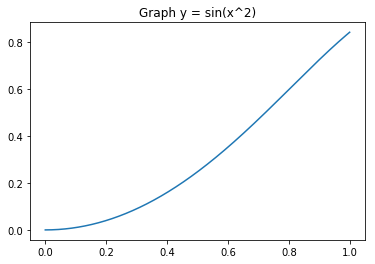

######################################################
n = 4 h = 0.125
Simpson method: 0.3102485323881818
Using scipy intergrate quad: 0.3102683017233811 err: 3.444670123846428e-15


In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import integrate



tochnost = 10**(-4)

def func (x):
    return math.sin(x**2)

def getXForGraphic (start,end,step):
    count=(int)(((float)(end-start)/step)+1)
    tmpxArray = np.zeros((count), dtype = float)

    for i in range(0,count):
        tmpxArray[i] = start + i * step
        #print(i * step)
    return tmpxArray

xArray = getXForGraphic (0,1,tochnost)
yArray = []

for i in xArray:
    yArray.append(func(i))
    
plt.plot(xArray,yArray)
plt.title("Graph y = sin(x^2)")
plt.show()

print("######################################################")

def getValueBySimpsonsMethod (xArr,h,n):
    coeff = h/3
    result = 0
    result += func(xArr[0])
    result += func(xArr[(2*n)])
    ###
    
    i = 1
    tmpSumm = 0
    
    while i<=(2*n-2):
        if (i%2) == 0:
            #print("i chetnie "+str(i))
            tmpSumm += func(xArr[i])
        i+=1
    result += 2*tmpSumm
        
    i = 1
    tmpSumm = 0
    
    while i<=(2*n-1):
        if (i%2) != 0:
            #print("i nehchetnoe "+str(i))
            tmpSumm += func(xArr[i])
        i+=1    
    result += 4*tmpSumm
    
    return coeff*result

def methodSimpsona (leftLim,rightLim,pogreshnost,n):
    RyngeCoeff = 1/15
    
    IntegrLast = None
    IntegrCurrent = None   
    
    boolForCycle = True

    while boolForCycle:
        currentH = (rightLim - leftLim)/(2*n)
        newXarray = getXForGraphic (leftLim,rightLim,currentH)
        
        integrSumm = getValueBySimpsonsMethod (newXarray,currentH,n)
        if (IntegrLast==None):
            IntegrLast = integrSumm
        else:
            IntegrCurrent = integrSumm
            if (RyngeCoeff*math.fabs(IntegrCurrent-IntegrLast))<pogreshnost:
                print("n = "+str(n)+" h = "+str(currentH))
                return IntegrCurrent
                #boolForCycle = False
            IntegrLast = None
            IntegrCurrent = None  
        n+=1
            
print("Simpson method: "+str(methodSimpsona (0,1,tochnost,1)))


res = integrate.quad(func,0,1)

print("Using scipy intergrate quad: "+str(res[0])+" err: "+str(res[1]))
